## Excercise 5

### For this exercise you can choose to use random forests or AdaBoost. (If you are interested, feel free to compare both methods, but this is not required for the assignment.) 

#### For your method of choice, find out what widely used implementations are available in your favourite programming language and apply the method to a prediction problem you find interesting (see, for instance the UCI Machine Learning repository for interesting datasets). 

In [1]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from sklearn.datasets import load_iris
from sklearn.datasets import load_wine

import numpy as np
import seaborn as sns

### The Iris dataset

In [2]:
# load the iris dataset
x = load_iris()['data']
y = load_iris()['target']
names = load_iris()['target_names']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 666)

In [3]:
# Function to make an ADA prediction which returns the accuracy score, accuracy of the different stages 
# and the class prediction for each instance
def ADAprediction(x_train, x_test, y_train, y_test, n_estimators= 50, random_state = 666, learning_rate = 1, 
                  algorithm = 'SAMME.R',  ADA = AdaBoostClassifier):
    ADA = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm,
                             random_state=random_state)
    ADA.fit(x_train,y_train)
    prediction = ADA.predict(x_test)
    score = ADA.score(x_test,y_test)
    staged_score = ADA.staged_score(x_test, y_test)
    
    return prediction, score, staged_score

In [4]:
# The number of different estimators used for the Iris dataset
Iris_number = 50

In [5]:
# The computation of the different combinations of the number of estimators and the learning rate 
# for the ADAboost classifier on the Iris dataset. Uses iris_number to determine the values for the parameters

result_list_iris = []
staged_score_iris = []

# Make results for adaboost, rows = n_estimators, column = learning_rate
for i in range(1,Iris_number+1):
    prediction, score, staged_score = ADAprediction(x_train, x_test, y_train, y_test, n_estimators = i)
    a = []
    b=[]
    
    for j in range(1,Iris_number+1):
        prediction, score, staged_score = ADAprediction(x_train, x_test, y_train, y_test, n_estimators = i, 
                                          learning_rate = j/Iris_number)
        
        a.append(score)
        stage=[]
        
        for x in staged_score:
            stage.append(x) # creates list of scores for each estimator. 50x1 up to 50x50 

        b.append(stage)
     
    result_list_iris.append(a) 
    staged_score_iris.append(b)

### The wine dataset

In [6]:
# loading the wine dataset
data = load_wine()
x = load_wine()['data']
y = load_wine()['target']
names = load_wine()['target_names']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 666)

In [7]:
# The number of different estimators used for the Wine dataset
Wine_number = 50

In [8]:
# The computation of the different combinations of the number of estimators and the learning rate 
# for the ADAboost classifier on the Wine dataset. Uses wine_number to determine the values for the parameters
result_list_wine = []
staged_score_wine = []

# Make results for adaboost, rows = n_estimators, column = learning_rate
for i in range(1,Wine_number+1):
    prediction, score, staged_score = ADAprediction(x_train, x_test, y_train, y_test, n_estimators = i)
    a = []
    b= []
    
    for j in range(1,Wine_number+1):
        prediction, score, staged_score = ADAprediction(x_train, x_test, y_train, y_test, n_estimators = i, learning_rate = j/Wine_number)
        a.append(score)
        stage=[]
        
        for x in staged_score:
            stage.append(x) # creates list of scores for each estimator. 50x1 up to 50x50 

        b.append(stage)
          
    result_list_wine.append(a)
    staged_score_wine.append(b)

In [9]:
# Selecting the prediction scores for different numbers of estimators
# Estimators only are computed with the learning rate on 1 as in the default ADAboost settings.
# Therefore we select the result with learning rate = 1 (which is the last result for each row)
estimators_wine = []
for i in range(1,len(result_list_wine)+1):
    estimators_wine.append(result_list_wine[i-1][Wine_number-1])
    
estimators_iris = []
for i in range(1,len(result_list_iris)+1):
    estimators_iris.append(result_list_iris[i-1][Iris_number-1])
 

# Selecting the number of estimators needed to achieve the maximum prediction score     
# Find index of first mention of highest accuracy. 
# This is thus the number of estimators needed to achieve the best result
# We do this for the case where the learning rate = 1
# The +1 is a correction for the index, since estimator 7 outputs its score at index 6
best_staged_scores_iris = []
for i in staged_score_iris:
    index_best = np.where(i[-1] == np.amax(i[-1]))[0][0]+1
    best_staged_scores_iris.append(index_best)
        
best_staged_scores_wine = []
for i in staged_score_wine:
    index_best = np.where(i[-1] == np.amax(i[-1]))[0][0]+1
    best_staged_scores_wine.append(index_best)


In [10]:
print(len(estimators_iris))
print(estimators_iris)
print(len(estimators_wine))
print(estimators_wine)

50
[0.6052631578947368, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.97368421052631

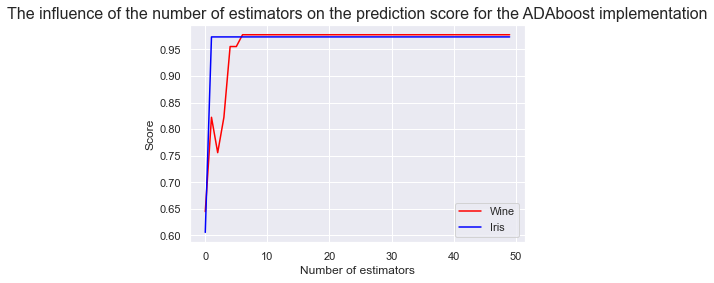

In [11]:
# Number of estimators vs learning rate 2D
sns.set()
plt.plot( estimators_wine, 'red', estimators_iris, 'blue')

plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.legend(["Wine", "Iris"])
plt.title('The influence of the number of estimators on the prediction score for the ADAboost implementation', 
          fontsize=16)

plt.show()

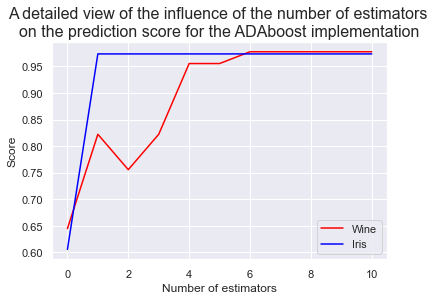

In [12]:
# Number of estimators vs learning rate 2D in more detail
sns.set()
plt.plot(estimators_wine[:11], 'red', estimators_iris[:11], 'blue')

plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.legend(["Wine", "Iris"])
plt.title('A detailed view of the influence of the number of estimators \n' +
           'on the prediction score for the ADAboost implementation', 
          fontsize=16)
plt.show()

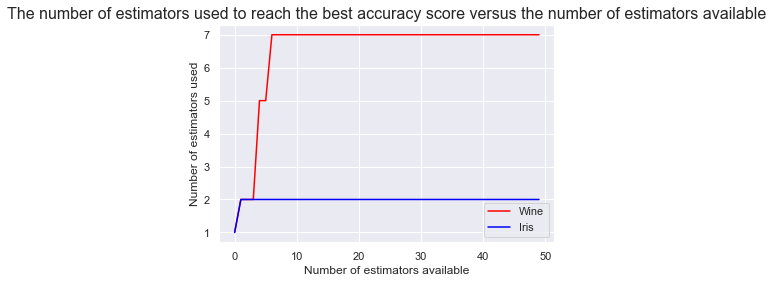

In [13]:
# The number of estimators needed vs the total number of estimators available 
sns.set()
plt.plot(best_staged_scores_wine, 'red', best_staged_scores_iris, 'blue')

plt.xlabel('Number of estimators available')
plt.ylabel('Number of estimators used')
plt.legend(["Wine", "Iris"])
plt.title('The number of estimators used to reach the best accuracy score versus the number of estimators available', 
          fontsize=16)
plt.show()

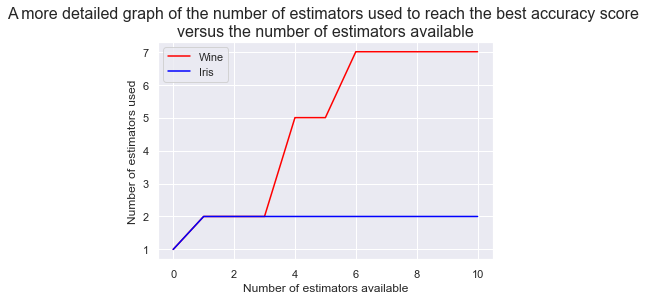

In [14]:
# The number of estimators needed vs the total number of estimators available in more detail
sns.set()
plt.plot(best_staged_scores_wine[:11], 'red', best_staged_scores_iris[:11], 'blue')

plt.xlabel('Number of estimators available')
plt.ylabel('Number of estimators used')
plt.legend(["Wine", "Iris"])
plt.title('A more detailed graph of the number of estimators used to reach the best accuracy score \n'+
          'versus the number of estimators available', 
          fontsize=16)
plt.show()

In [15]:
#Make arrays of the number of estimators and the learning rate
Number_Estimators = np.linspace(1, Wine_number, num=Wine_number).astype(int)
Learning_rate = np.linspace(1/Wine_number, 1, num=Wine_number)

# Make the grid of values for the number of estimators vs the learning rate
Number_Estimators, Learning_rate = np.meshgrid(Number_Estimators, Learning_rate)

result_list_wine = np.array(result_list_wine)

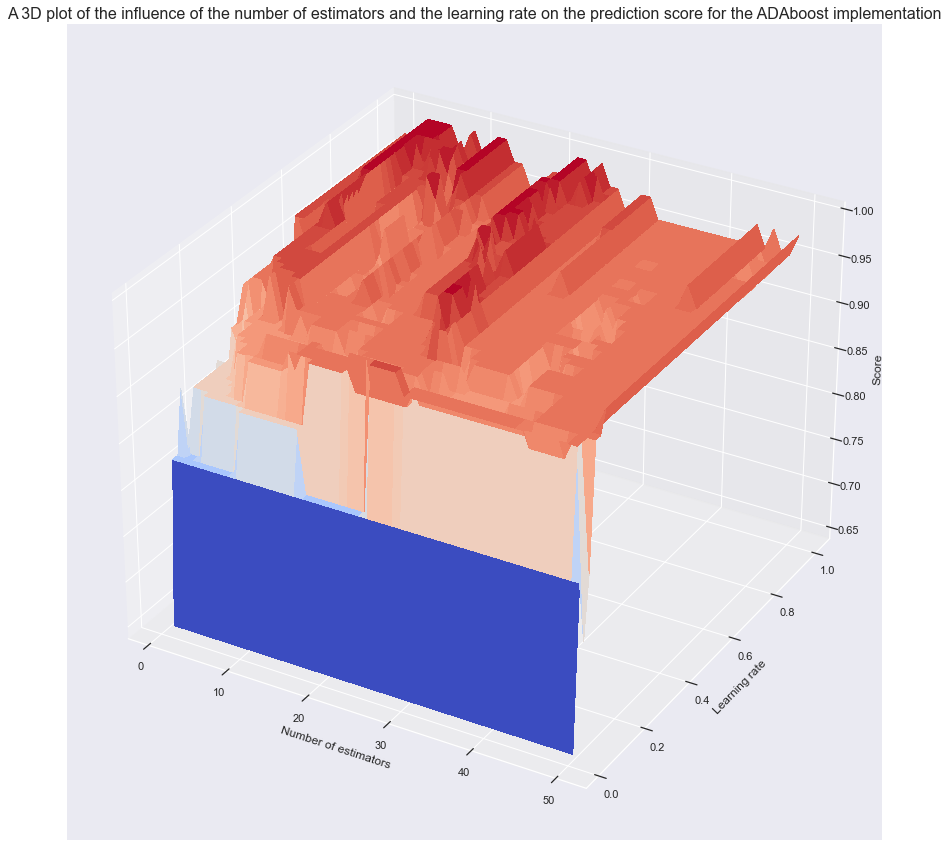

In [16]:
# A 3D plot comparing the performance vs the number of estimators vs the learning rate. 
# Lower learning rate will normally need more estimators. 
sns.set()
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

surf = ax.plot_surface( Number_Estimators, Learning_rate, result_list_wine,  cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel("Number of estimators")
ax.set_ylabel("Learning rate")
ax.set_zlabel("Score")
plt.title('A 3D plot of the influence of the number of estimators and the learning rate on the '  
          'prediction score for the ADAboost implementation', fontsize=16)

plt.show()

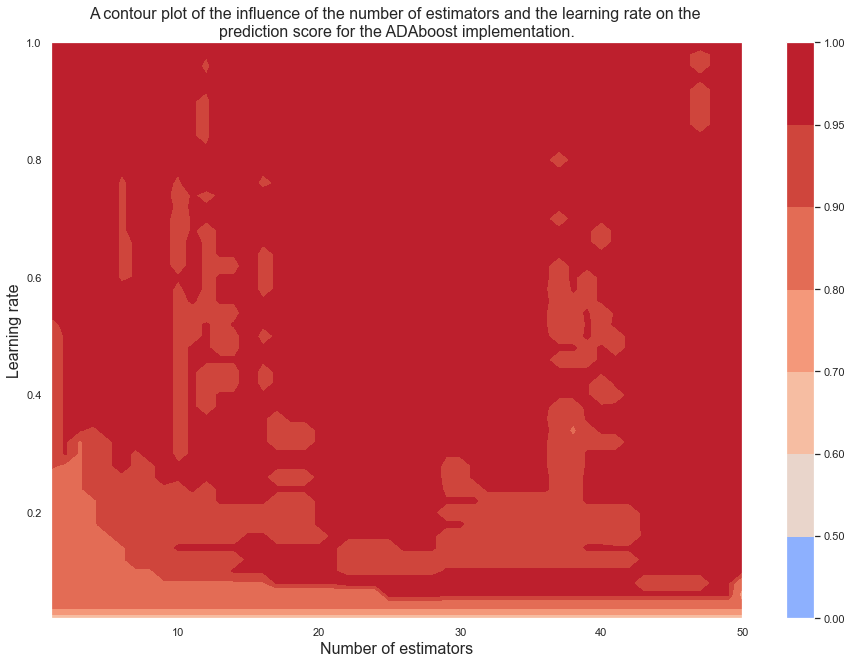

In [17]:
# A surface plot of the number of estimators vs the learning rate, where the surface represents the associated score. 
# This surface plot is the same as looking at the 3D plot from above. 

sns.set()
fig = plt.figure(figsize=(15,10))

left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

contour = ax.contourf(Number_Estimators, Learning_rate, result_list_wine, 
                      levels = [0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1], cmap= "coolwarm")
plt.colorbar(contour)

ax.set_xlabel('Number of estimators', fontsize = 16)
ax.set_ylabel('Learning rate', fontsize = 16)
# ax.set_zlabel("Score")
plt.title('A contour plot '
          'of the influence of the number of estimators and the learning rate on the \n'  
          'prediction score for the ADAboost implementation.', fontsize=16)

plt.show()

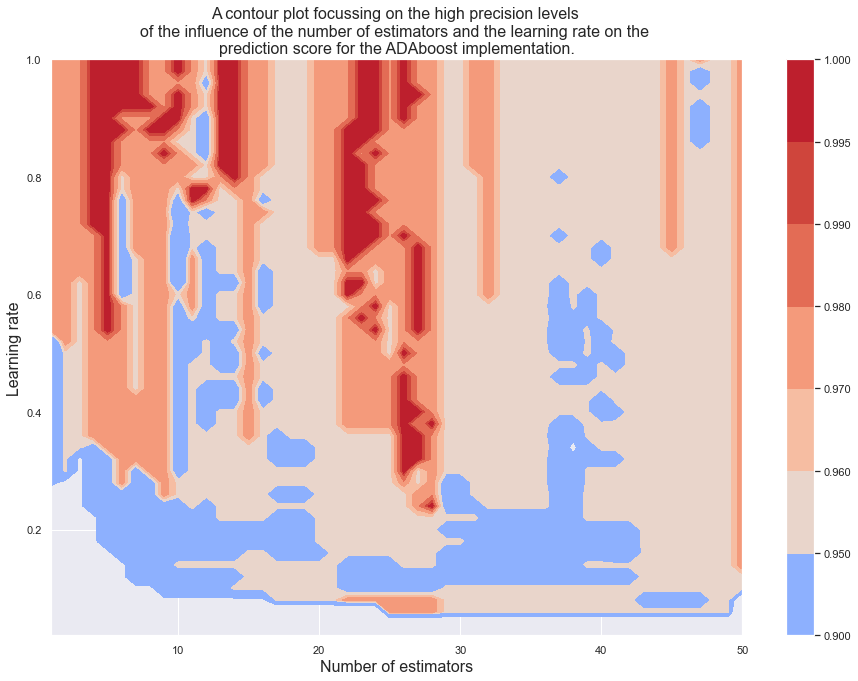

In [18]:
# A surface plot of the number of estimators vs the learning rate, where the surface represents the associated score. 
# This surface plot is the same as looking at the 3D plot from above.
# In this figure, we have limited the range of values to be coloured, 
# so we can better distinguish values in the top range.

sns.set()
fig = plt.figure(figsize=(15,10))

left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

contour = ax.contourf(Number_Estimators, Learning_rate, result_list_wine, 
                      levels = [0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 1], cmap= "coolwarm")
plt.colorbar(contour)

ax.set_xlabel('Number of estimators', fontsize = 16)
ax.set_ylabel('Learning rate', fontsize = 16)
# ax.set_zlabel("Score")
plt.title('A contour plot focussing on the high precision levels \n'
          'of the influence of the number of estimators and the learning rate on the \n'  
          'prediction score for the ADAboost implementation.', fontsize=16)

plt.show()

#### Write a short description (min. 100 words) of your findings, including what dataset and implementation you used, how you set up your experiment, what the effect of different parameter settings was, what the performance was, which variables were important et cetera.

For the experiments we used the Wine dataset and the Iris dataset which are both included in the sklearn python package. We split both datasets using train_test_split and set a test set size of 25% of the dataset. We then implemented the ADAboost classifier also from sklearn and tested for different parameter settings. First of all, we tested the impact of different numbers of estimators. This can be seen in the line graphs. 

Here we see that after a certain number of estimators, the performance reaches a ceiling. Adding more estimators does than not improve performance any more. For the Iris dataset this ceiling is at 1 estimator, while for the Wine dataset it is at 7 estimators. This can also be seen in the "number of estimators used vs the number of estimators available" graph. Here the highest score was selected, and then the first estimator to achieve that score was plotted for each possible number of estimators. Once again, for all these cases the learning rate was 1. We clearly see that even though the classifiers has for example 40 estimators available, it already achieves peak performance at 7 estimators for the wine dataset. After that, there is no point in giving more estimators, since this performance is never improved again. 

Another parameter which can be influenced is the learning rate. Previous tests have all been done with a learning rate of 1, but when we lower the learning rate, we need more estimators to achieve the same performance. This can be seen in the 3d graph, and in the countour graphs. Given the wine dataset, we see that peak performance is achieved for multiple combinations of estimators and learning rate. We see that at a learning rate of 0.4 the peak performance is only reached at about 25 estimators. We also see the same peak performance is achieved at 7 estimators for any learning rate between 1 and 0.7. The scenario of 7 estimators and a learning rate of 1 has been described before, but these graphs show us that there are multiple ways to tune the classifier to get the same accuracy on this dataset.